<a href="https://colab.research.google.com/github/SreeLakshmi1242/Projects/blob/main/Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_WoE_and_IV.pdf)

## Grading = 10 Points

### Download the dataset

In [1]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [2]:
!pip install xverse

In [3]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


### Import Neccesary Packages

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset
Presenter-Vikas

In [5]:
df=pd.read_csv('GiveMeSomeCredit.csv')

In [6]:
df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [7]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
per_non_defaulters=df[df['SeriousDlqin2yrs']==0].shape[0]/df['SeriousDlqin2yrs'].shape[0]
per_defaulters=df[df['SeriousDlqin2yrs']==1].shape[0]/df['SeriousDlqin2yrs'].shape[0]
print(per_defaulters)

0.06684


#### Describe the all statistical properties of the train dataset

In [9]:
# YOUR CODE HERE
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Pre-processing (1 point)

#### Remove unwanted columns

In [10]:
# YOUR CODE HERE
df.drop(columns=['Unnamed: 0'],inplace=True)

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [11]:
# YOUR CODE HERE
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [12]:
# Fill missing values in MonthlyIncome with the mean
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

# Fill missing values in NumberOfDependents with the mean
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean(), inplace=True)

### EDA &  Visualization ( 1 point)
Presenter- Amit

#### Calculate the percentage of the target lebels and visualize with a graph

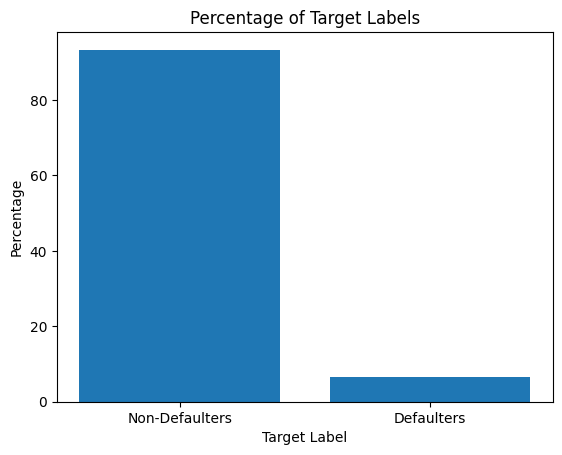

In [13]:
# YOUR CODE HERE

# Calculate the percentage of target labels
target_counts = df['SeriousDlqin2yrs'].value_counts()
target_percentage = target_counts / target_counts.sum() * 100

# Visualize with a bar chart
plt.bar(target_percentage.index, target_percentage.values)
plt.xlabel('Target Label')
plt.ylabel('Percentage')
plt.title('Percentage of Target Labels')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

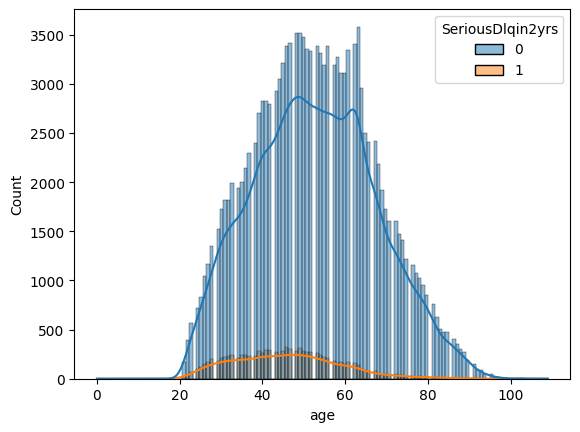

In [14]:
# YOUR CODE HERE
# YOUR CODE HERE
sns.histplot(data=df, x='age', hue='SeriousDlqin2yrs', kde=True)
plt.show()

#### Calculate the correlation and plot the heatmap

<Axes: >

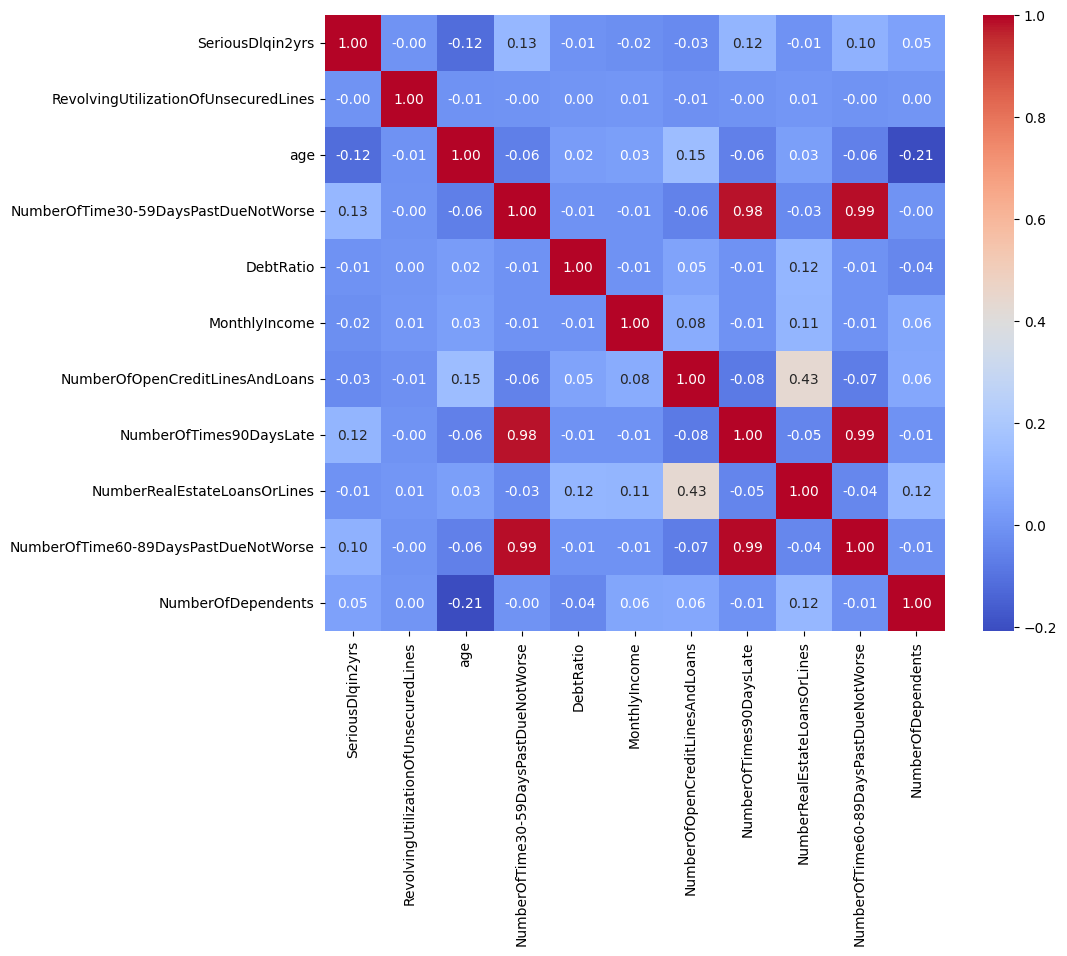

In [15]:
# YOUR CODE HERE
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

### Data Engineering (2 points)
Presenter- Raghu

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_Xverse.pdf). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [16]:
# YOUR CODE HERE
# Assigning Features / Target
Y = df['SeriousDlqin2yrs']
X = df.drop('SeriousDlqin2yrs',  axis = 1)

In [17]:
# Creating Bins
from xverse.transformer import MonotonicBinning
clf = MonotonicBinning()
clf.fit(X , Y)
print(clf.bins)
out_x=clf.transform(X)
output_bins = clf.bins

{'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.44198870e-02, 3.79945496e-01, 5.07080000e+04]), 'age': array([  0.,  45.,  59., 109.]), 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'DebtRatio': array([0.00000000e+00, 2.38192456e-01, 5.69938302e-01, 3.29664000e+05]), 'MonthlyIncome': array([      0.        ,    4700.        ,    6670.22123739,
       3008750.        ]), 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]), 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]), 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]), 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'NumberOfDependents': array([ 0.,  1., 20.])}


In [18]:
# YOUR CODE HERE
# Calculating IV

from xverse.transformer import WOE
clf = WOE()
clf.fit(X , Y)
clf.woe_df.head(50)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0544]",50000,877,49123,0.017540,0.982460,0.087473,0.350944,-1.389301,0.935429
1,RevolvingUtilizationOfUnsecuredLines,"(0.0544, 0.38]",50000,1556,48444,0.031120,0.968880,0.155196,0.346093,-0.802015,0.935429
2,RevolvingUtilizationOfUnsecuredLines,"(0.38, 50708.0]",50000,7593,42407,0.151860,0.848140,0.757331,0.302963,0.916188,0.935429
3,age,"(-0.001, 45.0]",51305,5019,46286,0.097827,0.902173,0.500598,0.330676,0.414666,0.219843
4,age,"(45.0, 59.0]",50377,3507,46870,0.069615,0.930385,0.349791,0.334848,0.043658,0.219843
5,age,"(59.0, 109.0]",48318,1500,46818,0.031044,0.968956,0.149611,0.334476,-0.804528,0.219843
6,NumberOfTime30-59DaysPastDueNotWorse,"(-0.001, 1.0]",142051,7450,134601,0.052446,0.947554,0.743068,0.961614,-0.257826,0.471831
7,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 98.0]",7949,2576,5373,0.324066,0.675934,0.256932,0.038386,1.901126,0.471831
8,DebtRatio,"(-0.001, 0.238]",50000,3019,46981,0.060380,0.939620,0.301117,0.335641,-0.108543,0.012360
9,DebtRatio,"(0.238, 0.57]",50000,3177,46823,0.063540,0.936460,0.316876,0.334512,-0.054162,0.012360


### Identify features,  target and split it into train and test
Presenter- Satgur

In [19]:
woe_table = clf.woe_df

In [20]:
out_X = clf.transform(X)


In [21]:
clf.iv_df

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.935429
6,NumberOfTimes90DaysLate,0.484202
4,NumberOfTime30-59DaysPastDueNotWorse,0.471831
5,NumberOfTime60-89DaysPastDueNotWorse,0.264824
9,age,0.219843
1,MonthlyIncome,0.065725
2,NumberOfDependents,0.023730
3,NumberOfOpenCreditLinesAndLoans,0.023300
0,DebtRatio,0.012360
7,NumberRealEstateLoansOrLines,0.001605


In [22]:
out_X = out_X.drop(['DebtRatio' , 'NumberRealEstateLoansOrLines'] , axis = 1)

In [23]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(out_X, Y, test_size=0.2, shuffle=True)

### Logistic Regression from scratch using gradient method (2 points)
Presenter- Sree

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

In [24]:
def sigmoid(x):
    return np.maximum(np.minimum(1/(1+np.exp(-x)), 0.9999), 0.0001)

In [25]:
def cost_function(X, y, theta):
  t=X.dot(theta)
  return -np.sum(y * np.log(sigmoid(t)) + (1-y) * np.log(1 - sigmoid(t))) / X.shape[0]
#   # -(np.mean(y*np.log(sigmoid(t)) + (1-y)*np.log(1-sigmoid(t))))

In [26]:
def gradient_cost_function(X, y, theta):
  t=X.dot(theta)
  return (X.T.dot(y-sigmoid(t))/X.shape[0])

In [27]:
def update_theta(X, y, theta,learning_rate):
  return theta + learning_rate*gradient_cost_function(X, y, theta)

In [28]:
def predict(X, theta):
  return sigmoid(X.dot(theta)>=0.5).astype(int)

def get_accuracy(x,y,theta):
  y_pred =  predict(x, theta)
  return (y_pred==y).sum()/y.shape[0]

In [29]:
def train(X, y, learning_rate, iterations=500,threshold=0.002):
  theta = np.zeros(X.shape[1])
  costs = []
  print("start training")
  for i in range(iterations):
    cost = cost_function(X, y, theta)
    print(f'[Training step #{i}]-Cost function: {cost :.4f}')
    costs.append({'cost':cost,'weights':theta})
    print(costs)
    print("Accuracy :", get_accuracy(X_test,y_test,theta))
    theta = update_theta(X, y, theta,learning_rate)
    print(theta)
    if i>15 and abs(costs[-2]['cost']-costs[-1]['cost'])<threshold:
      break

  return theta, costs

theta,costs = train(X_train, y_train,learning_rate=0.005)

start training
[Training step #0]-Cost function: 0.6931
[{'cost': 0.6931471805599453, 'weights': array([0., 0., 0., 0., 0., 0., 0., 0.])}]
Accuracy : 0.9321666666666667
RevolvingUtilizationOfUnsecuredLines    0.001215
age                                     0.000292
NumberOfTime30-59DaysPastDueNotWorse    0.000458
MonthlyIncome                           0.000081
NumberOfOpenCreditLinesAndLoans         0.000029
NumberOfTimes90DaysLate                 0.000399
NumberOfTime60-89DaysPastDueNotWorse    0.000214
NumberOfDependents                      0.000029
dtype: float64
[Training step #1]-Cost function: 0.6928
[{'cost': 0.6931471805599453, 'weights': array([0., 0., 0., 0., 0., 0., 0., 0.])}, {'cost': 0.692750464781083, 'weights': RevolvingUtilizationOfUnsecuredLines    0.001215
age                                     0.000292
NumberOfTime30-59DaysPastDueNotWorse    0.000458
MonthlyIncome                           0.000081
NumberOfOpenCreditLinesAndLoans         0.000029
NumberOfTimes90D

In [30]:


accuracy = get_accuracy(X_test,y_test,theta)
print('Accuracy :', accuracy)

Accuracy : 0.9321666666666667


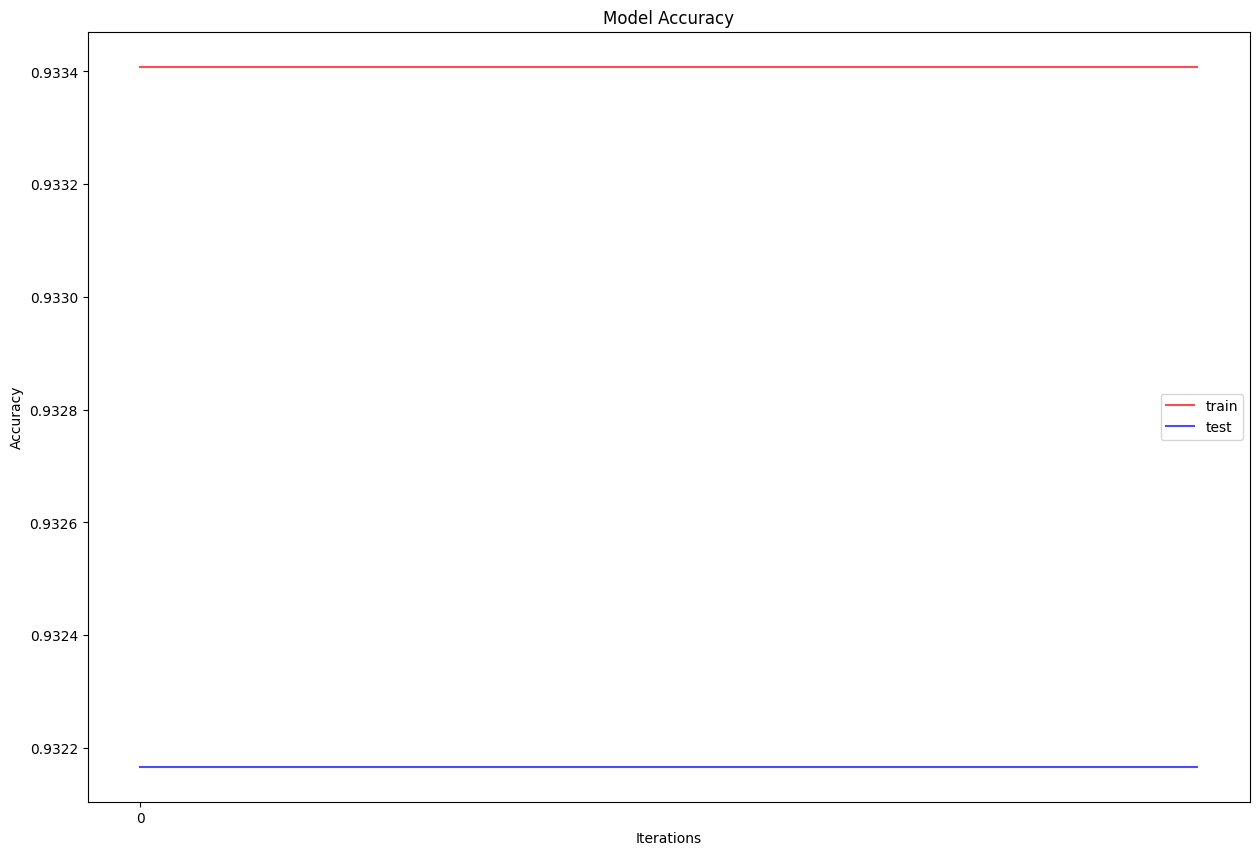

In [31]:
plt.figure(figsize=(15,10))
plt.title("Model Accuracy")
plt.plot(np.arange(0,len(costs)),
[get_accuracy(X_train,y_train,c['weights']) for c in costs],
alpha=0.7,
label = 'train',
color='r')
plt.plot(np.arange(0,len(costs)),
[get_accuracy(X_test,y_test,c['weights']) for c in costs],
alpha=0.7,
label = 'test',
color='b')

plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.xticks(np.arange(0,len(costs)+1,40))
plt.show()

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### Implement the Logistic regression using sklearn (2 points)
Presenter- Pankaj

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

class_weights_list = [
    {0: 0.06, 1: 0.933},
    {0: 1, 1: 5},
    {0: 1, 1: 10},
    {0: 1, 1: 15},
    {0: 1, 1: 20},
    {0: 1, 1: 25},
]

for weights in class_weights_list:
    lr = LogisticRegression(class_weight=weights, max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f'Class Weights: {weights}, F1 Score: {f1:.2f}')

Class Weights: {0: 0.06, 1: 0.933}, F1 Score: 0.28
Class Weights: {0: 1, 1: 5}, F1 Score: 0.38
Class Weights: {0: 1, 1: 10}, F1 Score: 0.30
Class Weights: {0: 1, 1: 15}, F1 Score: 0.27
Class Weights: {0: 1, 1: 20}, F1 Score: 0.26
Class Weights: {0: 1, 1: 25}, F1 Score: 0.25


In [33]:
# Train logistic regression with class weightage

class_weights = {0: 1, 1: 5}
lr_with_weight = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=10000)
lr_with_weight.fit(X_train, y_train)

# Predict and evaluate
y_pred_with_weight = lr_with_weight.predict(X_test)
accuracy_with_weight = accuracy_score(y_test, y_pred_with_weight)
f1 = f1_score(y_test, y_pred_with_weight)
print("Accuracy with class weightage:", accuracy_with_weight)
print("F1 SCORE with class weightage:", f1)

Accuracy with class weightage: 0.9246333333333333
F1 SCORE with class weightage: 0.3807176116132566


In [34]:
# Without weightage
# YOUR CODE HERE
# Train logistic regression without class weightage

lr_no_weight = LogisticRegression(random_state=42)
lr_no_weight.fit(X_train, y_train)

# Predict and evaluate
y_pred_no_weight = lr_no_weight.predict(X_test)
accuracy_no_weight = accuracy_score(y_test, y_pred_no_weight)
f1 = f1_score(y_test, y_pred_no_weight)
print("Accuracy with out class weightage:", accuracy_no_weight)
print("F1 SCORE with out class weightage:", f1)

Accuracy with out class weightage: 0.9353666666666667
F1 SCORE with out class weightage: 0.18012684989429173


### Credit scoring (1 point)
Presenter- Harshal



When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [35]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [36]:
# YOUR CODE HERE
# No weight
cols = X_train.columns.to_list()
coef_lr = lr_no_weight.coef_
intercept_lr = lr_no_weight.intercept_
n_lr=len(coef_lr[0])
woe_table
woe_dict = woe_table[woe_table['Variable_Name'].isin(out_X.columns)].set_index(['Variable_Name','Category'])['WOE'].to_dict()

In [37]:
d = {"col":[],"bin":[],'score':[]}
score_df_no_weight = pd.DataFrame(d)
for col,beta in zip(cols,coef_lr[0]):
  for bin,woe in woe_dict.items():
    if col in bin:
      score = int(-(beta * woe + (intercept_lr/n_lr)) * factor + (offset/n_lr))
      score_df_no_weight=score_df_no_weight.append({"col":bin[0],'bin':bin[1],'score':score},ignore_index=True)
score_df_no_weight

,col,bin,score
0,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0544]",101.0
1,RevolvingUtilizationOfUnsecuredLines,"(0.0544, 0.38]",88.0
2,RevolvingUtilizationOfUnsecuredLines,"(0.38, 50708.0]",50.0
3,age,"(-0.001, 45.0]",64.0
4,age,"(45.0, 59.0]",69.0
5,age,"(59.0, 109.0]",81.0
6,NumberOfTime30-59DaysPastDueNotWorse,"(-0.001, 1.0]",75.0
7,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 98.0]",35.0
8,MonthlyIncome,"(-0.001, 4700.0]",65.0
9,MonthlyIncome,"(4700.0, 6670.221]",71.0


In [38]:
# YOUR CODE HERE
# Weighted
cols = X_train.columns.to_list()
coef_lr = lr_with_weight.coef_
intercept_lr = lr_with_weight.intercept_
n_lr=len(coef_lr[0])
woe_table
woe_dict = woe_table[woe_table['Variable_Name'].isin(out_X.columns)].set_index(['Variable_Name','Category'])['WOE'].to_dict()

In [39]:
d = {"col":[],"bin":[],'score':[]}
score_df_weight = pd.DataFrame(d)
for col,beta in zip(cols,coef_lr[0]):
  for bin,woe in woe_dict.items():
    if col in bin:
      score = int(-(beta * woe + (intercept_lr/n_lr)) * factor + (offset/n_lr))
      score_df_weight=score_df_weight.append({"col":bin[0],'bin':bin[1],'score':score},ignore_index=True)
score_df_weight

,col,bin,score
0,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0544]",95.0
1,RevolvingUtilizationOfUnsecuredLines,"(0.0544, 0.38]",82.0
2,RevolvingUtilizationOfUnsecuredLines,"(0.38, 50708.0]",44.0
3,age,"(-0.001, 45.0]",58.0
4,age,"(45.0, 59.0]",63.0
5,age,"(59.0, 109.0]",76.0
6,NumberOfTime30-59DaysPastDueNotWorse,"(-0.001, 1.0]",69.0
7,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 98.0]",25.0
8,MonthlyIncome,"(-0.001, 4700.0]",59.0
9,MonthlyIncome,"(4700.0, 6670.221]",65.0


### Performance Metrics (1 point)
Presenter- Anusha

#### Precision

In [40]:
# Non weighted
prec = 0
for i,r in zip(y_pred_no_weight,np.array(y_test)):
  if i==r:
    prec+=i
print('Non weighted precision:',round(prec/(y_pred_no_weight).sum(),2))

Non weighted precision: 0.65


In [41]:
# Weighted
prec = 0
for i,r in zip(y_pred_with_weight,np.array(y_test)):
  if i==r:
    prec+=i
print('Weighted precision:',round(prec/(y_pred_with_weight).sum(),2))

Weighted precision: 0.43


#### Recall

In [42]:
# Non weighted
recall = 0
for i,r in zip(y_pred_no_weight,np.array(y_test)):
  if i==r:
    recall+=i
print('Non weighted recall:',round(recall/(y_test).sum(),2))

Non weighted recall: 0.1


In [43]:
# Weighted
recall = 0
for i,r in zip(y_pred_with_weight,np.array(y_test)):
  if i==r:
    recall+=i
print('Weighted recall:',round(recall/(y_test).sum(),2))

Weighted recall: 0.34


#### Classification Report

In [44]:
# YOUR CODE HERE
from sklearn.metrics import classification_report
target_names = ['Defaulter', 'Non Defaulter']
print('Weighted')
print(classification_report(y_test, y_pred_with_weight, target_names=target_names))

print('\nNon Weighted')
print(classification_report(y_test, y_pred_no_weight, target_names=target_names))

Weighted
               precision    recall  f1-score   support

    Defaulter       0.95      0.97      0.96     27965
Non Defaulter       0.43      0.34      0.38      2035

     accuracy                           0.92     30000
    macro avg       0.69      0.65      0.67     30000
 weighted avg       0.92      0.92      0.92     30000


Non Weighted
               precision    recall  f1-score   support

    Defaulter       0.94      1.00      0.97     27965
Non Defaulter       0.65      0.10      0.18      2035

     accuracy                           0.94     30000
    macro avg       0.79      0.55      0.57     30000
 weighted avg       0.92      0.94      0.91     30000



#### Confusion matrix

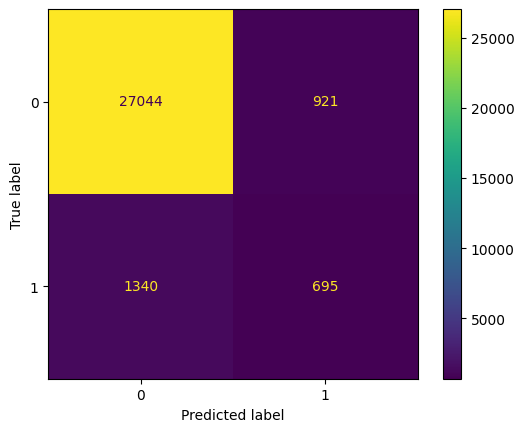

In [45]:
# Weighted matrix
matrix=confusion_matrix(y_test, y_pred_with_weight)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

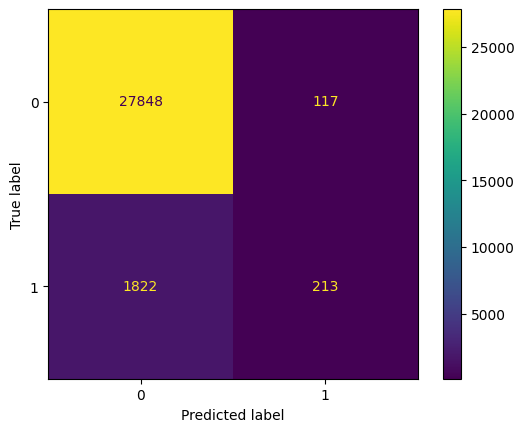

In [46]:
# Weighted matrix
matrix=confusion_matrix(y_test, y_pred_no_weight)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

**Aditi Ravishankar**

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations

**Implementation of Logistic regression with normal features instead of WOE**


Without Weightage

In [47]:
df_normal = df.copy()
X_normal = df_normal.drop('SeriousDlqin2yrs',  axis = 1)
y_normal = df_normal['SeriousDlqin2yrs']

# Split data into training and test sets
X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(X_normal, y_normal, test_size=0.2, random_state=42)

# Initialize logistic regression model (Without Weightage)
lr_norm_no_weight = LogisticRegression(max_iter=10000)

# Fit the model
lr_norm_no_weight.fit(X_normal_train, y_normal_train)

# Predict on the test set
y_pred_normal_no_weight = lr_norm_no_weight.predict(X_normal_test)

accuracy_normal_features = accuracy_score(y_normal_test, y_pred_normal_no_weight)
print("Accuracy with normal features", accuracy_normal_features)

Accuracy with normal features 0.9346666666666666


With Weightage

In [48]:
class_weights_list = [
    {0: 0.06, 1: 0.933},
    {0: 1, 1: 5},
    {0: 1, 1: 10},
    {0: 1, 1: 15},
    {0: 1, 1: 20},
    {0: 1, 1: 25},
]

for weights in class_weights_list:
    lr = LogisticRegression(class_weight=weights, max_iter=10000)
    lr.fit(X_normal_train, y_normal_train)
    y_pred = lr.predict(X_normal_test)
    f1 = f1_score(y_normal_test, y_pred)
    print(f'Class Weights: {weights}, F1 Score: {f1:.2f}')

Class Weights: {0: 0.06, 1: 0.933}, F1 Score: 0.34
Class Weights: {0: 1, 1: 5}, F1 Score: 0.27
Class Weights: {0: 1, 1: 10}, F1 Score: 0.39
Class Weights: {0: 1, 1: 15}, F1 Score: 0.31
Class Weights: {0: 1, 1: 20}, F1 Score: 0.24
Class Weights: {0: 1, 1: 25}, F1 Score: 0.22


In [49]:
# Train logistic regression with class weightage
best_weights = {0: 1, 1: 5}
lr_norm_with_weight = LogisticRegression(class_weight=best_weights, random_state=42, max_iter=10000)
lr_norm_with_weight.fit(X_normal_train, y_normal_train)

# Predict and evaluate
y_pred_normal_with_weight = lr_norm_with_weight.predict(X_normal_test)
accuracy_with_weight = accuracy_score(y_normal_test, y_pred_normal_with_weight)
print("Accuracy with class weightage:", accuracy_with_weight)

Accuracy with class weightage: 0.9321333333333334


### **REPORT**

CLASS DISTRIBUTION






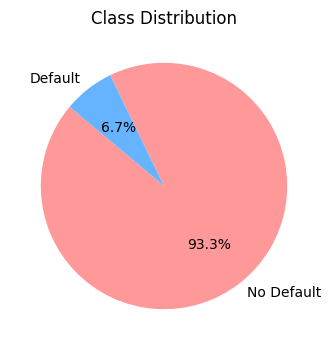

COMPARISON OF CLASSIFICATION REPORTS






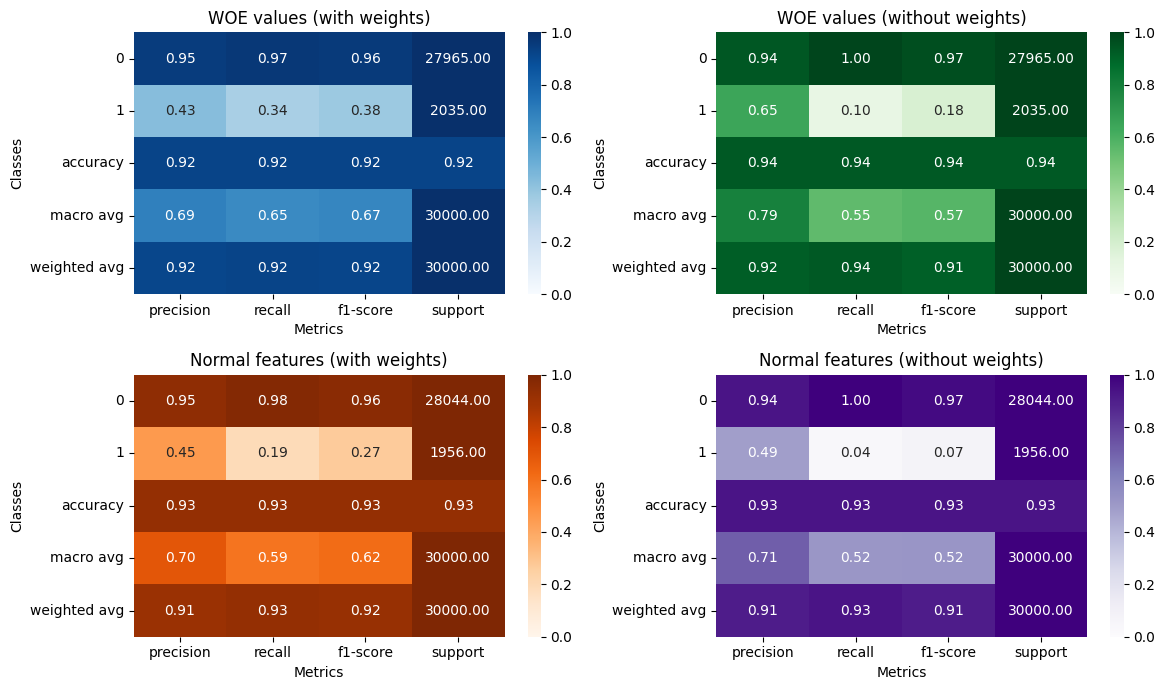

COMPARISON OF METRICS






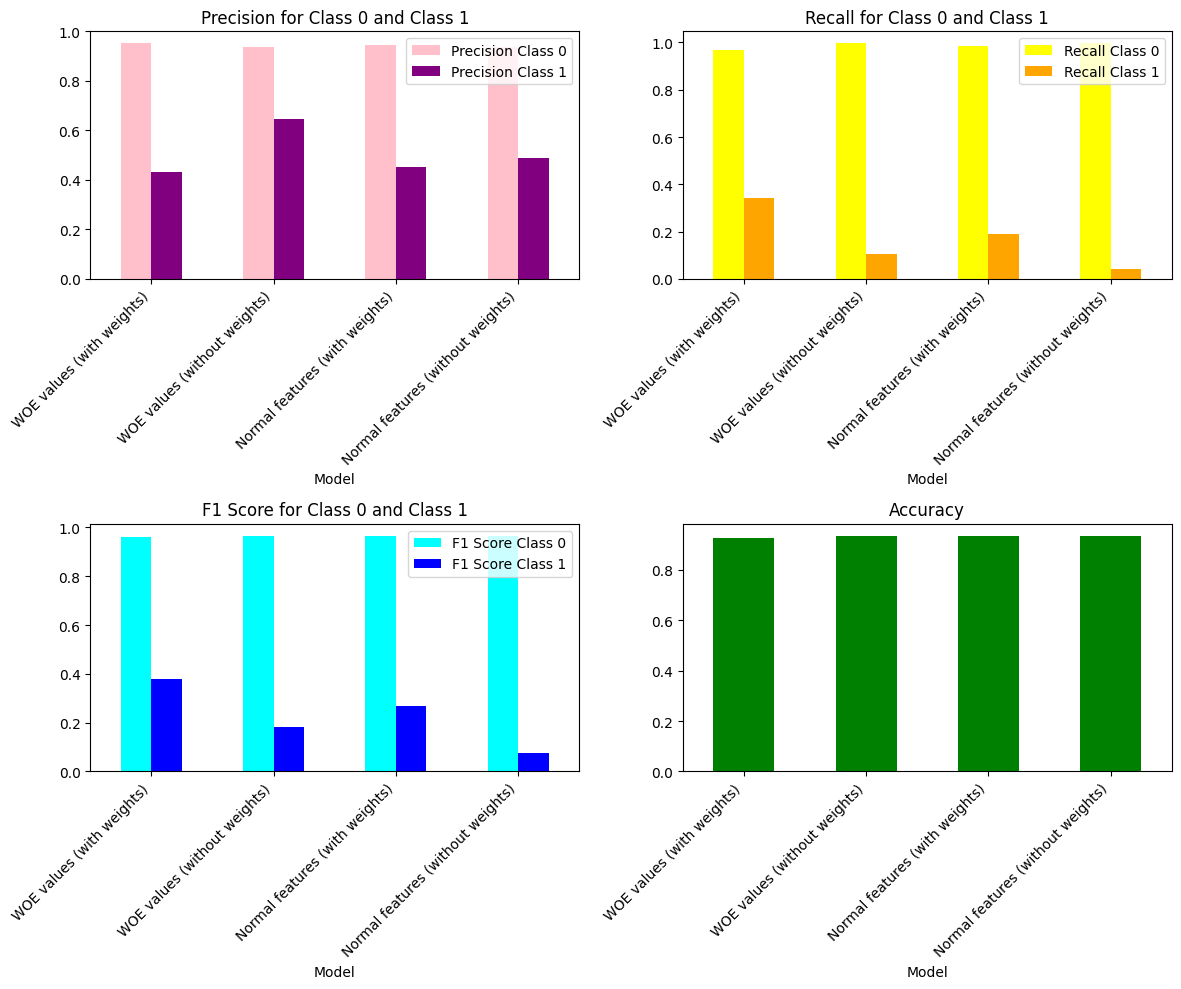





COMPARISON OF CONFUSION MATRICES






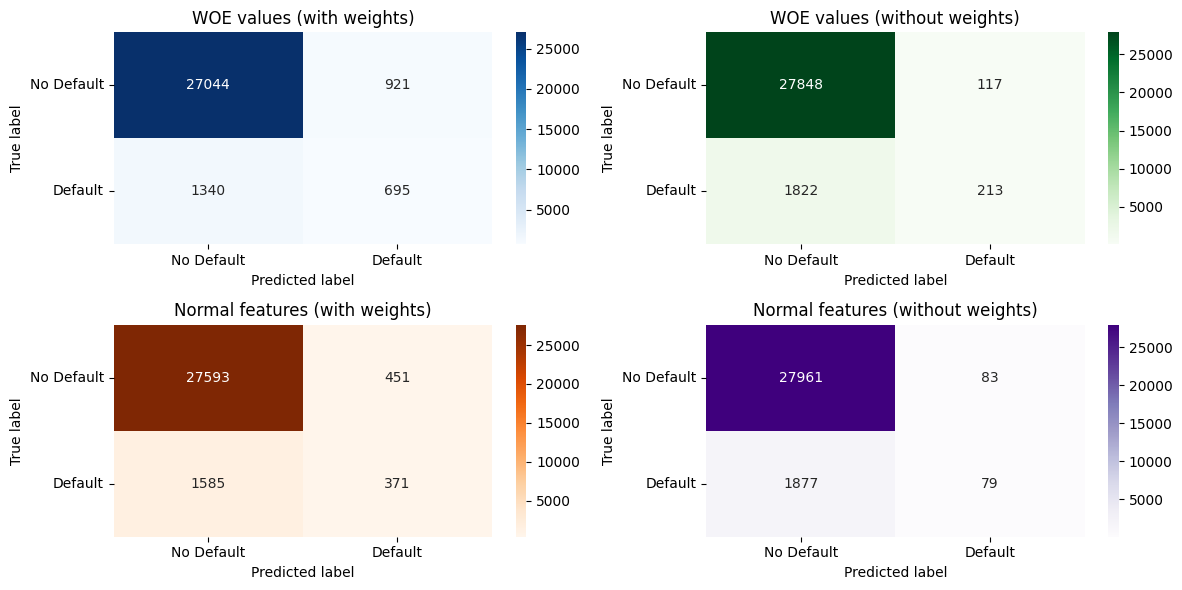

COMPARISON OF ROC CURVES






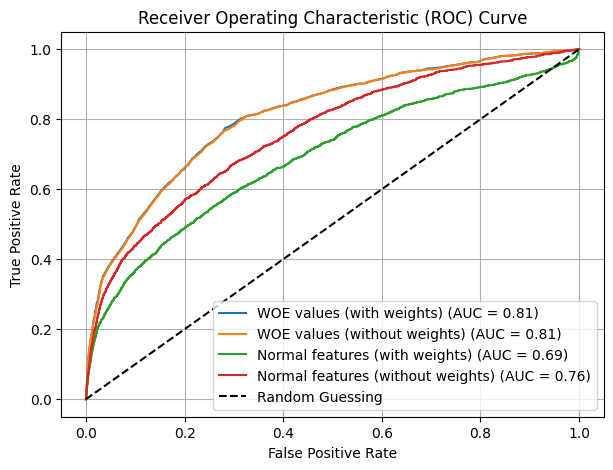

In [50]:
from sklearn.metrics import roc_curve, auc

#------------------------------------- CLASS DISTRIBUTION ------------------------------------------
print("\033[1mCLASS DISTRIBUTION\033[0m")
print("\n\n\n")

# Get class distribution
class_counts = df_normal['SeriousDlqin2yrs'].value_counts()
class_labels = ['No Default', 'Default']
class_sizes = class_counts.values

# Plotting pie chart
plt.figure(figsize=(6, 4))
plt.pie(class_sizes, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution')
plt.show()

#-------------------------------------------------------------------------------

predictions_woe = {
    "WOE values (with weights)": y_pred_with_weight,
    "WOE values (without weights)": y_pred_no_weight,

}
predictions_normal = {
    "Normal features (with weights)": y_pred_normal_with_weight,
    "Normal features (without weights)": y_pred_normal_no_weight
}

# Define colormaps for each plot
colormaps_woe = {
    "WOE values (with weights)": "Blues",
    "WOE values (without weights)": "Greens",
}
colormaps_normal = {
    "Normal features (with weights)": "Oranges",
    "Normal features (without weights)": "Purples"
}

#------------------------------------- CLASSIFICATION REPORTS ------------------------------------------

print("\033[1mCOMPARISON OF CLASSIFICATION REPORTS\033[0m")
print("\n\n\n")

report_woe_weight = classification_report(y_test, y_pred_with_weight, output_dict=True)
report_woe_no_weight = classification_report(y_test, y_pred_no_weight, output_dict=True)
report_normal_weight = classification_report(y_normal_test, y_pred_normal_with_weight, output_dict=True)
report_normal_no_weight = classification_report(y_normal_test, y_pred_normal_no_weight, output_dict=True)

# Convert reports to DataFrames
def report_to_df(report):
    df = pd.DataFrame(report).transpose()
    return df

df_woe_weight = report_to_df(report_woe_weight)
df_woe_no_weight = report_to_df(report_woe_no_weight)
df_normal_weight = report_to_df(report_normal_weight)
df_normal_no_weight = report_to_df(report_normal_no_weight)

# Create a dictionary of DataFrames and model names
reports_woe = {
    "WOE values (with weights)": df_woe_weight,
    "WOE values (without weights)": df_woe_no_weight,
}

reports_normal = {
    "Normal features (with weights)": df_normal_weight,
    "Normal features (without weights)": df_normal_no_weight
}

# Set up the plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes = axes.ravel()

# Plot each classification report
for idx, (model_name, df) in enumerate(reports_woe.items()):
    sns.heatmap(df, annot=True, fmt=".2f", cmap=colormaps_woe[model_name], ax=axes[idx], vmin=0, vmax=1)
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Metrics')
    axes[idx].set_ylabel('Classes')

# Plot each classification report
for idx, (model_name, df) in enumerate(reports_normal.items()):
    sns.heatmap(df, annot=True, fmt=".2f", cmap=colormaps_normal[model_name], ax=axes[idx+2], vmin=0, vmax=1)
    axes[idx+2].set_title(model_name)
    axes[idx+2].set_xlabel('Metrics')
    axes[idx+2].set_ylabel('Classes')

# Remove any empty subplots (if any)
for ax in axes[len(reports_woe) + len(reports_normal):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#------------------------------------- COMPARISON OF METRICS ------------------------------------------

print("\033[1mCOMPARISON OF METRICS\033[0m")
print("\n\n\n")

# Initialize data structures
metrics = {
    'Model': [],
    'Precision Class 0': [],
    'Precision Class 1': [],
    'Recall Class 0': [],
    'Recall Class 1': [],
    'F1 Score Class 0': [],
    'F1 Score Class 1': [],
    'Accuracy': []
}

# Calculate metrics for each model
for model_name, y_pred in predictions_woe.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['Precision Class 0'].append(report['0']['precision'])
    metrics['Precision Class 1'].append(report['1']['precision'])
    metrics['Recall Class 0'].append(report['0']['recall'])
    metrics['Recall Class 1'].append(report['1']['recall'])
    metrics['F1 Score Class 0'].append(report['0']['f1-score'])
    metrics['F1 Score Class 1'].append(report['1']['f1-score'])
    metrics['Accuracy'].append(accuracy)

for model_name, y_pred in predictions_normal.items():
    report = classification_report(y_normal_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_normal_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['Precision Class 0'].append(report['0']['precision'])
    metrics['Precision Class 1'].append(report['1']['precision'])
    metrics['Recall Class 0'].append(report['0']['recall'])
    metrics['Recall Class 1'].append(report['1']['recall'])
    metrics['F1 Score Class 0'].append(report['0']['f1-score'])
    metrics['F1 Score Class 1'].append(report['1']['f1-score'])
    metrics['Accuracy'].append(accuracy)

df_metrics = pd.DataFrame(metrics)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Plot Precision
df_metrics.set_index('Model')[['Precision Class 0', 'Precision Class 1']].plot(kind='bar', ax=axes[0], color=['pink', 'purple'])
axes[0].set_title('Precision for Class 0 and Class 1')
axes[0].set_xticklabels(df_metrics['Model'], rotation=45, ha='right')

# Plot Recall
df_metrics.set_index('Model')[['Recall Class 0', 'Recall Class 1']].plot(kind='bar', ax=axes[1], color=['yellow', 'orange'])
axes[1].set_title('Recall for Class 0 and Class 1')
axes[1].set_xticklabels(df_metrics['Model'], rotation=45, ha='right')

# Plot F1 Score
df_metrics.set_index('Model')[['F1 Score Class 0', 'F1 Score Class 1']].plot(kind='bar', ax=axes[2], color=['cyan', 'blue'])
axes[2].set_title('F1 Score for Class 0 and Class 1')
axes[2].set_xticklabels(df_metrics['Model'], rotation=45, ha='right')

# Plot Accuracy
df_metrics.set_index('Model')['Accuracy'].plot(kind='bar', ax=axes[3], color='green')
axes[3].set_title('Accuracy')
axes[3].set_xticklabels(df_metrics['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

#------------------------------------- CONFUSION MATRICES ------------------------------------------

print("\n\n\n")
print("\033[1mCOMPARISON OF CONFUSION MATRICES\033[0m")
print("\n\n\n")

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.ravel()

for idx, (model_name, preds) in enumerate(predictions_woe.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap=colormaps_woe[model_name], ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted label')
    axes[idx].set_ylabel('True label')
    axes[idx].set_xticklabels(['No Default', 'Default'])
    axes[idx].set_yticklabels(['No Default', 'Default'], rotation=0)

for idx, (model_name, preds) in enumerate(predictions_normal.items()):
    cm = confusion_matrix(y_normal_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap=colormaps_normal[model_name], ax=axes[idx+2])
    axes[idx+2].set_title(model_name)
    axes[idx+2].set_xlabel('Predicted label')
    axes[idx+2].set_ylabel('True label')
    axes[idx+2].set_xticklabels(['No Default', 'Default'])
    axes[idx+2].set_yticklabels(['No Default', 'Default'], rotation=0)

# Remove any empty subplots (if any) # REMOVE +1 AFTER GRADIENT DESCENT IS ADDED
for ax in axes[len(predictions_woe) + len(predictions_normal)+1:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#------------------------------------- COMPARISON OF ROC CURVES ------------------------------------------

print("\033[1mCOMPARISON OF ROC CURVES\033[0m")
print("\n\n\n")

# Compute ROC curve and AUC for each model
def compute_roc_curve(y_test, pred_prob1):
    fpr, tpr, _ = roc_curve(y_test, pred_prob1[:,1],pos_label=1)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc


pred_prob_weight = lr_with_weight.predict_proba(X_test)
pred_prob_no_weight = lr_no_weight.predict_proba(X_test)
pred_prob_weight_norm = lr_norm_no_weight.predict_proba(X_normal_test)
pred_prob_no_weight_norm = lr_norm_with_weight.predict_proba(X_normal_test)


roc_data = {
    "WOE values (with weights)": compute_roc_curve(y_test, pred_prob_weight),
    "WOE values (without weights)": compute_roc_curve(y_test, pred_prob_no_weight),
    "Normal features (with weights)": compute_roc_curve(y_normal_test, pred_prob_weight_norm),
    "Normal features (without weights)": compute_roc_curve(y_normal_test, pred_prob_no_weight_norm)
}

# Plotting ROC curves
plt.figure(figsize=(7, 5))

for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **Conclusion and Reasoning**
The dataset is highly imbalanced, with class 0 ("No Default") making up 93.4% of the data and class 1 ("Default") only 6.6%. This imbalance significantly influences the performance of the model.





#### **Model Performance:**

**F1 Score**:
**In terms of the F1 Score, the Logistic Regression model utilizing WOE values (with Weightage) is the best in this scenario. (F1 Score = 0.39)**


**Class 0 (No Default)**: The F1 score for class 0 is 0.96, indicating that the model performs exceptionally well in predicting "No Default" cases. This high F1 score is due to the abundance of class 0 samples in the training data, allowing the model to learn and generalize well for this class.
**Class 1 (Default)**: The F1 score for class 1 is 0.39, which is relatively low. This lower score is attributed to the scarcity of class 1 samples. With fewer "Default" cases to learn from, the model struggles to generalize as effectively, resulting in poorer performance.

**Accuracy**:

The overall accuracy is good in all models. However, accuracy alone can be misleading in the context of imbalanced datasets. Given that 93% of the data belongs to class 0, a model that predicts "No Default" for all instances would still achieve 93% accuracy without providing useful predictions for class 1.

#### **Reasoning**:

##### **Class Imbalance Impact**:

* The significant class imbalance causes the model to be biased towards the majority class (class 0). This is because the model aims to minimize the overall error, which it can achieve more easily by correctly predicting the majority class.
* Although class weighting helps to some extent by penalizing misclassifications of the minority class more heavily, the limited number of class 1 samples restricts the model's ability to learn diverse patterns for "Default" cases.

##### **Weight of Evidence (WOE) Transformation**:

* The use of WOE transformation helps to handle categorical variables and improve the model’s interpretability and predictive power. By using WOE, we can transform categorical variables into numerical ones, which logistic regression can handle more effectively.
* Despite this advantage, the inherent imbalance in the dataset still hampers the model's performance for class 1. WOE transformation enhances the model's ability to differentiate between classes, but it cannot fully compensate for the lack of sufficient class 1 samples.

#####**Class Weighting**:

* Implementing class weighting in logistic regression attempts to balance the learning process by assigning higher weights to the minority class (class 1) and lower weights to the majority class (class 0). This technique helps to some extent, as seen in the improved F1 score for class 1 compared to an unweighted approach.
* However, the improvement is limited because the fundamental issue of class imbalance still persists. The model's performance for class 1 can only improve significantly with more representative samples of the minority class.

#### **Summary**:

* The high accuracy (93%) reflects the model's proficiency in predicting the
majority class (No Default). However, this metric alone is insufficient to gauge the model's overall performance due to the imbalance.
* The disparity in F1 scores (0.96 for class 0 and 0.37 for class 1) highlights the model's struggle with minority class prediction. This discrepancy is a common challenge when dealing with imbalanced datasets.
* While WOE transformation and class weighting help improve the model's performance for the minority class, they cannot fully address the imbalance issue. Collecting more data for the minority class may yield better results.